# Machine Learning 4: Modelos no lineales y aprendizaje por conjuntos

1. Modelos no lineales
    * Regla del vecino más próximo (Nearest Neighbors).
    * Árboles de decisión.
    * Extendiendo Support Vector Machines a Casos No Lineales. Breve Introducción a Kernels.

2. Aprendizaje por conjuntos (Ensemble Learning)
    * Introducción al aprendizaje por conjuntos
    * Bagging y Random Forest
    * Introducción al problema multiclase y 'Error Correcting Output Coding'

# 1. Modelos no lineales

En nuestro último ejercicio, demostramos que los modelos lineales pueden lograr muy buenos resultados. Esto es especialmente cierto en conjuntos de datos con una gran dimensionalidad. En esos casos, la relación entre los datos y el número de dimensiones puede ser bastante pequeña. Como resultado, tenemos un conjunto de datos dispersos y es muy probable que un modelo lineal sea suficiente. Sin embargo, si tenemos grandes cantidades de datos, esto no será suficiente. En esos casos, es posible que tengamos que utilizar modelos no lineales. 

En este cuaderno introduciremos dos conceptos: no linealidad y multiclase. 
Se tratarán tres modelos: 
* Vecinos Cercanos
* Árboles de Decisión
* Aprendizaje Kernel

Aplicaremos estos modelos para predecir la rotación de clientes. 
Presentemos primero el caso práctico:

# EJERCICIO: Análisis de la perdida de clientes (Clients Churn)

Predecir el churn significa entender qué es lo que mantiene al cliente enganchado a nuestro producto y que hace que lo deje. El objetivo del análisis es predecir o describir la «tasa de abandono», es decir, el porcentaje de clientes que abandona o cesa la suscripción a un servicio. Su valor reside en el hecho de que captar nuevos clientes suele ser más caro y costoso que retener a los existentes. Por este motivo, las empresas basadas en negocios de suscripción suelen tener políticas proactivas de retención de clientes.

En este ejercicio, nuestro objetivo es crear un modelo basado en aprendizaje automático para predecir la pérdida de clientes a partir de los datos de una empresa de telecomunicaciones. Cada fila del conjunto de datos representa a un cliente de telefonía suscrito. Cada columna contiene atributos del cliente como el número de teléfono, los minutos de llamada utilizados en diferentes momentos del día, los gastos incurridos por los servicios, la duración de la cuenta y si el cliente sigue siéndolo o no.

Este caso se inspira parcialmente en el análisis de Eric Chiang sobre la tasa de abandono de clientes. Los datos están disponibles en el conjunto de datos de repositorios de Machine Learning de la Universidad de California Irvine.

El conjunto completo de atributos es el siguiente:

+ Estado: categórico, para los 50 estados y el Distrito de Columbia.
+ Duración de la cuenta: valor entero, cuánto tiempo ha estado activa una cuenta. 
+ Código de área: categórico
+ Número de teléfono: ID del cliente
+ Plan internacional: binario, sí o no.
+ Plan de correo de voz: binario, sí o no
+ Número de mensajes de voz: valor entero
+ Minutos totales del día: continuo, minutos que el cliente utilizó el servicio durante el día
+ Total de llamadas diarias: valor entero
+ Carga total por día: continua
+ Minutos totales por la tarde: continuo, minutos que el cliente utilizó el servicio por la tarde
+ Total de llamadas nocturnas: valor entero
+ Coste total por noche: continuo
+ Total de minutos nocturnos: continuo, minutos que el cliente utilizó el servicio durante la noche
+ Total llamadas nocturnas: valor entero
+ Coste total por llamadas nocturnas: continuo
+ Total minutos internacionales: continuo, minutos que el cliente utilizó el servicio para hacer llamadas internacionales
+ Total llamadas internacionales: valor entero
+ Coste internacional total: continuo
+ Número de llamadas al servicio de atención al cliente: valor entero

In [1]:
from __future__ import division
import pandas as pd
import numpy as np

churn_df = pd.read_csv('files/churn.csv')
col_names = churn_df.columns.tolist()

print ("Column names:")
print (col_names)

to_show = col_names[:6] + col_names[-6:]

print ("\nSample data:")
churn_df[to_show].head(6)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']

Sample data:


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,9.18,6.3,6,1.70,0,False.


In [2]:
# Isolate target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)

# We don't need these columns
to_drop = ['State','Phone','Churn?']
churn_feat_space = churn_df.drop(to_drop,axis=1) #X

# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0. later
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

# Pull out features for future use
features = churn_feat_space.columns

X = churn_feat_space.values.astype(np.float)

print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 18 features
Unique target labels: [0 1]


C:\Users\alfons.marques\AppData\Local\Temp\ipykernel_6860\1408307727.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = churn_feat_space.values.astype(np.float)


In [3]:
X

array([[128.  , 415.  ,   0.  , ...,   3.  ,   2.7 ,   1.  ],
       [107.  , 415.  ,   0.  , ...,   3.  ,   3.7 ,   1.  ],
       [137.  , 415.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 28.  , 510.  ,   0.  , ...,   6.  ,   3.81,   2.  ],
       [184.  , 510.  ,   1.  , ...,  10.  ,   1.35,   2.  ],
       [ 74.  , 415.  ,   0.  , ...,   4.  ,   3.7 ,   0.  ]])

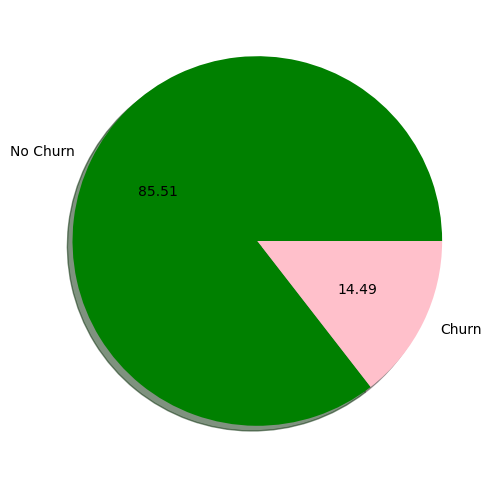

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],labels=['No Churn','Churn'],colors=['green','pink'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

In [5]:
#Save data for future use.
import pickle
ofname = open('churn_data.pkl', 'wb')
s = pickle.dump([X,y,features],ofname)
ofname.close()

<div class = "alert alert-success">**PREGUNTA: ** Este tipo de conjuntos de datos se denominan **conjuntos de datos desequilibrados**. Nombra un clasificador trivial con «buena» precisión en este conjunto de datos.
</div>

<div class = "alert alert-info">
**Sets de datos no balanceados**
<p>
El término desequilibrado o no balanceado, en un set de datos, describe la condición de los datos en la que la proporción entre los tamaños de los positivos y los negativos es un valor pequeño. En esos casos, predecir siempre la clase mayoritaria suele dar buenos resultados de precisión, aunque sea poco informativo. Este tipo de problemas es muy común cuando queremos modelizar sucesos poco habituales, como enfermedades raras, la aparición de un fallo en una maquinaria, operaciones fraudulentas con tarjetas de crédito, etc. En estos casos, recopilar datos de sucesos habituales es muy fácil, pero recopilar datos de sucesos inusuales es difícil y da como resultado un conjunto de datos comparativamente pequeño. Para medir el rendimiento en esos conjuntos de datos hay que utilizar otras métricas de rendimiento, como la especificidad o el valor predictivo positivo en la clase minoritaria. Al final, el valor de una clasificación errónea de una muestra depende de la aplicación y del usuario. Por ejemplo, en la detección del cáncer, dado que el coste de que falte un paciente en un ensayo es muy grande, queremos que el predictor tenga una sensibilidad muy grande (no aceptamos falsos negativos) aunque ello implique aceptar más falsos positivos. Estos falsos positivos pueden descartarse en pruebas posteriores.
</div>

#  1.1. Regla del vecino más próximo (Nearest Neighbors)

Nearest Neighbors pertenece a la familia del aprendizaje basado en instancias y del aprendizaje perezoso (Lazy Learning). Los modelos basados en instancias basan el modelo en la evaluación de una función que depende del punto que estemos consultando y de los datos de entrenamiento. Nearest Neighbors es la **más simple** de estas técnicas. La lógica de este modelo es la siguiente: Cada conjunto de datos de entrenamiento puede verse como un caso/problema resuelto. Así, dado un nuevo problema, podemos recuperar el caso más *similar* de nuestro conjunto de datos y aplicar la misma solución. En el caso de la clasificación, esto significa que seleccionamos la etiqueta del ejemplo de datos más similar de nuestro conjunto de entrenamiento.

C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


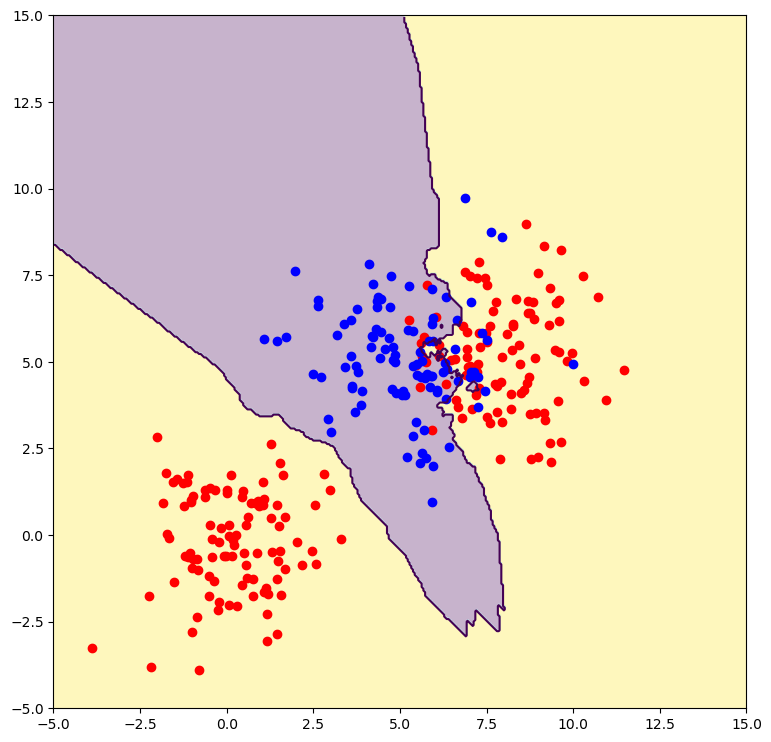

In [6]:
#Let's see what the boundary looks like in a toy problem.

MAXN=100
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

from sklearn import neighbors
from sklearn import metrics

delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];

#Evaluate the model for a given weight
clf = neighbors.KNeighborsClassifier(11)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

Observaciones:

+ El límite es lineal a trozos. Está compuesta por aristas del diagrama de Voronoi.
+ Observa que el clasificador se ajusta perfectamente a los datos de entrenamiento. Añadir o eliminar un punto de datos puede cambiar en gran medida la frontera. Esto implica que la complejidad del método es grande.
+ El componente clave del clasificador de Nearest Neighbors es la noción de similitud/distancia.

Recuerda que la regularización modela explícitamente la complejidad. La regularización suele ser un término de penalización. En Nearest Neighbors podemos penalizar las soluciones con un «apoyo» pequeño utilizando una votación por mayoría en las muestras de datos $k$ más cercanas a la muestra de consulta.

C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


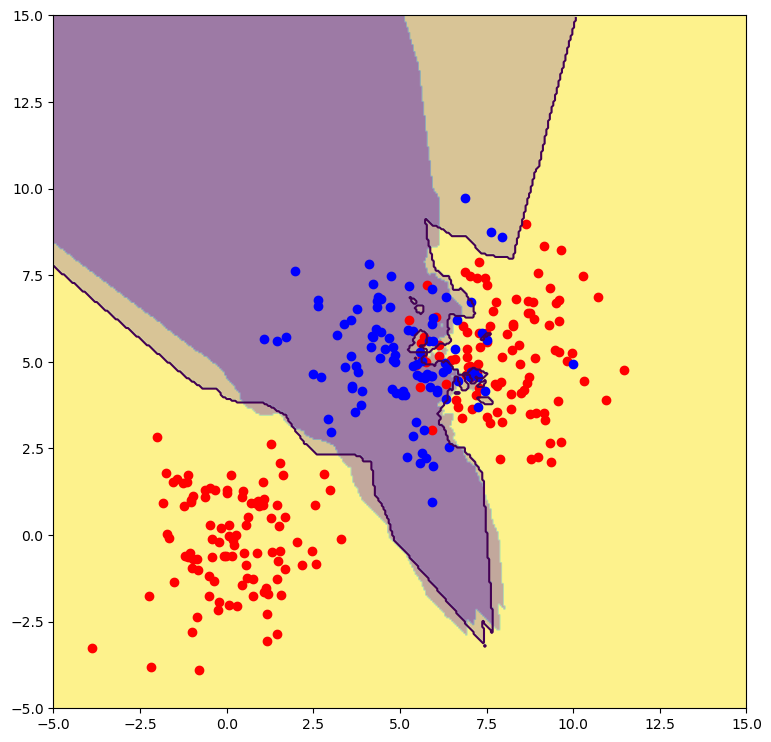

In [7]:
#Let's see what the boundary looks like in a toy problem.

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

clf = neighbors.KNeighborsClassifier(3)
clf.fit(X,y.ravel())
Z2=clf.predict(data)
Z2.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.4, vmin=-1, vmax=1)
plt.imshow(Z2, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.2, vmin=-1, vmax=1)

plt.contour(XX,YY,Z2,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

## 1.1.1 Clasificación del churn con Nearest Neighbors.

Volvamos al análisis del problema de la predicción de la pérdida de clientes. Podemos ajustar un clasificador 1-Nearest Neighbor y comprobar el resultado.

In [8]:
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = data[1]
print ('Loading ok.')

Loading ok.


In [9]:
from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics
acc = np.zeros((5,))
i=0
kf=model_selection.KFold(n_splits=5)
kf.get_n_splits()
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = neighbors.KNeighborsClassifier(n_neighbors=1)
    dt.fit(X_train,y_train)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.8106784445615031


C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [10]:
X_train[0,:]

array([128.  , 415.  ,   0.  ,   1.  ,  25.  , 265.1 , 110.  ,  45.07,
       197.4 ,  99.  ,  16.78, 244.7 ,  91.  ,  11.01,  10.  ,   3.  ,
         2.7 ,   1.  ])

C:\Users\alfons.marques\AppData\Local\Temp\ipykernel_6860\3338893031.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
C:\Users\alfons.marques\AppData\Local\Temp\ipykernel_6860\3338893031.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


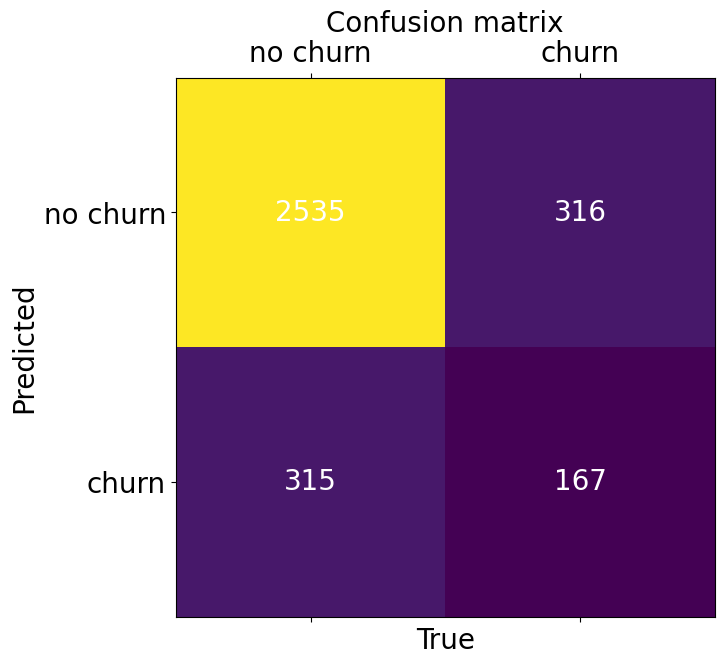

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2850
           1       0.35      0.35      0.35       483

    accuracy                           0.81      3333
   macro avg       0.62      0.62      0.62      3333
weighted avg       0.81      0.81      0.81      3333



In [11]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

Este es un resultado bastante malo. Recuerda que seleccionando siempre la clase «no churn» deberíamos obtener alrededor de $85\%$ de precisión. Como se notó antes, la definición de distancia es crítica. En NN utilizamos la distancia euclidiana. Las distancias suponen que todas las variables operan a la misma escala, es decir, que todas son conmensurables. Un cambio de una unidad en una de las variables equivale a/es tan importante como un cambio de 1 unidad en la otra. En este conjunto de datos, esto no ocurre. Por ejemplo, los valores de los códigos de área se sitúan en torno a 400, mientras que si el cliente disfruta de un plan internacional toma los valores 0 y 1. Así pues, podemos dar cuenta de estos cambios escalando las características. La forma más habitual de hacerlo es la normalización o estandarización de las características. En esta técnica de preprocesamiento, cada característica se escala para que tenga una media cero y una desviación estándar unitaria.

In [12]:
# Standarize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
from sklearn import metrics
acc_snooping = np.zeros((5,))
i=0
kf=model_selection.KFold(n_splits=5, shuffle=False)
kf.get_n_splits()
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = neighbors.KNeighborsClassifier(1)
    dt.fit(X_train,y_train)
    yhat[test_index] = dt.predict(X_test)
    acc_snooping[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc_snooping)))


Mean accuracy: 0.86468927698313


C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

<div class="alert alert-error"> **PREGUNTA:** En el primer proceso hemos entrado demasiado accidentalmente en los datos y el resultado está contaminado. ¿Dónde?</div>

In [14]:
#NO SNOOPING
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    dt = neighbors.KNeighborsClassifier(1)
    dt.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.864388526457492


C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

[Text(1, 0, 'snooping'), Text(2, 0, 'no snooping')]

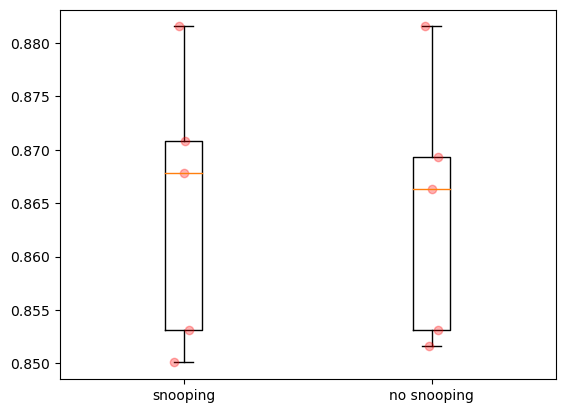

In [15]:
acct=np.c_[acc_snooping,acc]
plt.boxplot(acct);
for i in range(2):
    xderiv = (i+1)*np.ones(acct[:,i].shape)+(np.random.rand(5,)-0.5)*0.1
    plt.plot(xderiv,acct[:,i],'ro',alpha=0.3)
ax = plt.gca()
ax.set_xticklabels(['snooping', 'no snooping'])

C:\Users\alfons.marques\AppData\Local\Temp\ipykernel_6860\3338893031.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
C:\Users\alfons.marques\AppData\Local\Temp\ipykernel_6860\3338893031.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


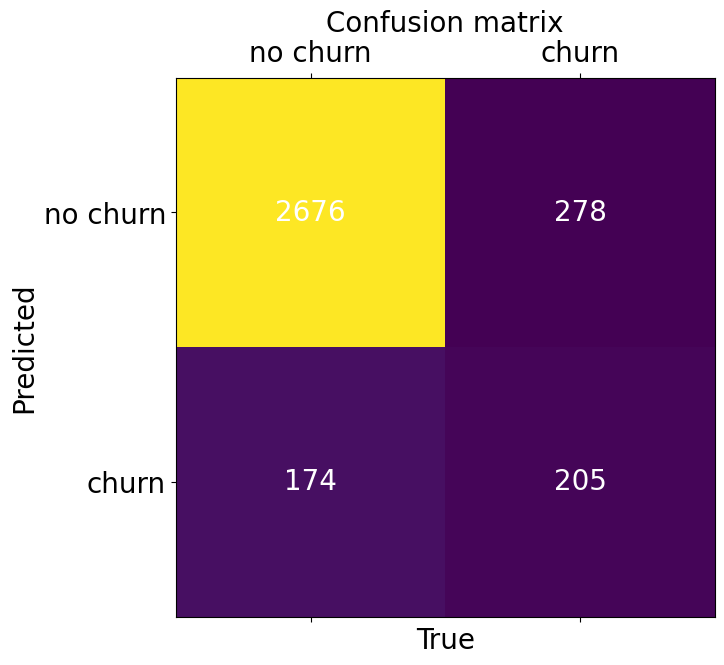

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2850
           1       0.54      0.42      0.48       483

    accuracy                           0.86      3333
   macro avg       0.72      0.68      0.70      3333
weighted avg       0.85      0.86      0.86      3333



In [16]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

## Breve Descripción de la Matriz de Confusión

Este resultado es mucho mejor. Como hemos visto, la precisión puede ser poco informativa en algunos problemas. Por esta razón, podemos utilizar otras medidas de rendimiento. Las medidas de rendimiento clásicas pueden derivarse de la matriz de confusión. Consideremos la siguiente matriz de confusión:

C:\Users\alfons.marques\AppData\Local\Temp\ipykernel_6860\2442502195.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
C:\Users\alfons.marques\AppData\Local\Temp\ipykernel_6860\2442502195.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


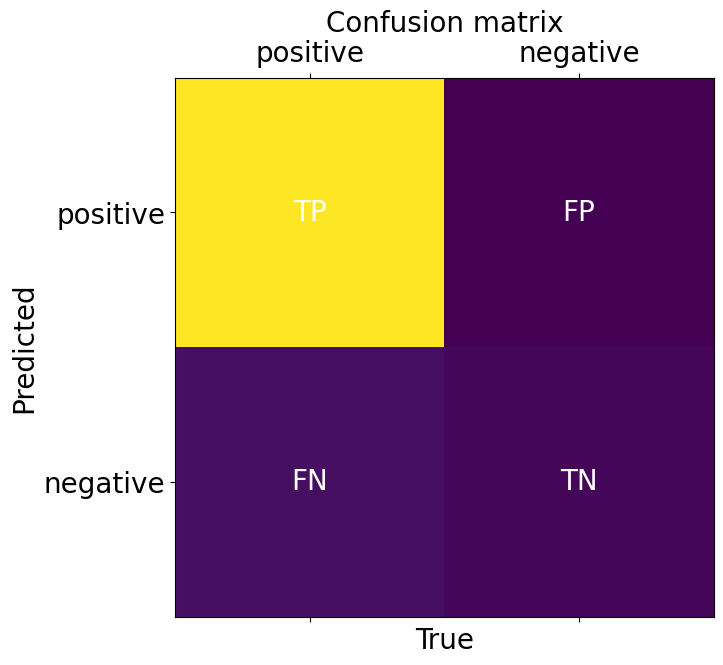

In [17]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    ax.text(0, 0, 'TP', va='center', ha='center',color='white',size=20)
    ax.text(0, 1, 'FN', va='center', ha='center',color='white',size=20)
    ax.text(1, 0, 'FP', va='center', ha='center',color='white',size=20)
    ax.text(1, 1, 'TN', va='center', ha='center',color='white',size=20)            
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['positive', 'negative'])

La matriz se divide en cuatro cuartos y contiene:

+ Verdaderos Positivos (TP): Muestras positivas predichas como tales.
+ Verdaderos Negativos (TN): Muestras negativas predichas como tales.
+ Falsos Positivos (FP): Muestras negativas predichas como positivas.
+ Falsos Negativos (FN): Muestras positivas predichas como negativas.

La combinación de estos elementos permite definir varias métricas de rendimiento:

+ Precisión:

$$\text{accuracy}=\frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$$

Por columnas encontramos estas dos métricas de rendimiento parciales:

+ Sensibilidad o Recall:

$$\text{sensitivity}=\frac{\text{TP}}{\text{Reales Positivos}}=\frac{\text{TP}}{\text{TP}+\text{FN}}$$

+ Especificidad:

$$\text{specificity}=\frac{\text{TN}}{\text{Reales Negativos}}=\frac{\text{TN}}{\text{TN}+\text{FP}}$$

Por filas encontramos estas dos métricas de rendimiento parciales:

+ Precisión o Valor Predictivo Positivo:

$$\text{precision}=\frac{\text{TP}}{\text{Positivos Predichos}}=\frac{\text{TP}}{\text{TP}+\text{FP}}$$

+ Valor predictivo negativo:

$$\text{NPV}=\frac{\text{TN}}{\text{Negativos Predichos}}=\frac{\text{TN}}{\text{TN}+\text{FN}}$$

El concepto de muestras positivas y negativas es puramente arbitrario, por lo tanto, realmente tenemos que recordar los conceptos de precisión/valor predictivo positivo y sensibilidad/recall.

In [ ]:
# Let us check the concepts with churn as the positive class
TP = np.sum(np.logical_and(yhat==1,y==1))
TN = np.sum(np.logical_and(yhat==0,y==0))
FP = np.sum(np.logical_and(yhat==1,y==0))
FN = np.sum(np.logical_and(yhat==0,y==1))

print ('TP: ' + str(TP))
print ('TN: ' + str(TN))
print ('FP: ' + str(FP))
print ('FN: ' + str(FN))
print ('sensitivity/recall: '+ str(TP/(TP+FN)))
print ('precision: '+ str(TP/(TP+FP)))


## Cuándo Usar Recall y Precisión

En el contexto de tareas de clasificación, entender cuándo priorizar el recall o la precisión puede impactar enormemente la efectividad de tu modelo, especialmente en diferentes escenarios del mundo real.

### Recall (Sensibilidad)

- **Cuándo Usar**: El recall debe priorizarse cuando el costo de los falsos negativos es alto. En otras palabras, cuando es crucial capturar tantas instancias positivas como sea posible.
- **Escenario Ejemplo**: Diagnósticos médicos donde fallar en detectar una enfermedad (falso negativo) podría ser mortal. En tales casos, es mejor tener algunas falsas alarmas (falsos positivos) que perderse un caso positivo.
  
$$\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

### Precisión (Valor Predictivo Positivo)

- **Cuándo Usar**: La precisión debe priorizarse cuando el costo de los falsos positivos es alto. Esto es importante cuando el objetivo es ser lo más exacto posible con las predicciones positivas.
- **Escenario Ejemplo**: Detección de spam en correos electrónicos donde es más disruptivo clasificar erróneamente correos importantes como spam (falsos positivos) que perderse algunos correos spam (falsos negativos).

$$\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

### Especificidad

- **Cuándo Usar**: La especificidad debe priorizarse cuando es importante capturar verdaderos negativos. Esta métrica es crucial cuando se debe descartar con certeza la presencia de una condición.
- **Escenario Ejemplo**: Cribado de una enfermedad rara en una gran población, donde es importante identificar a aquellos que definitivamente no tienen la enfermedad.

$$\text{specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}$$

### Elegir la Métrica Adecuada

Decidir si priorizar el recall o la precisión (o la especificidad) a menudo depende de los costos relativos de los falsos positivos frente a los falsos negativos:

- **Alto Costo de Falsos Negativos**: Priorizar el recall.
- **Alto Costo de Falsos Positivos**: Priorizar la precisión.
- **Enfoque Equilibrado Necesario**: Considerar usar el puntaje F1, que es la media armónica de la precisión y el recall, o la curva AUC-ROC, que considera tanto la tasa de verdaderos positivos (recall) como la tasa de falsos positivos (1 - especificidad).

Recuerda, la elección de la métrica debe alinearse con los objetivos comerciales o los requisitos específicos de la tarea en cuestión.

### Análisis de la matriz de confusión en nuestro problema

Nuestro objetivo es predecir la pérdida de clientes, por lo que podemos preguntarnos con qué frecuencia el clasificador la predice correctamente. Consideraremos la «pérdida de clientes» como la clase positiva. La pregunta que nos hacemos es la relación entre el $TP$ y todos los $\text{Real Positives}$. Esto es la *sensibilidad* o *recuperación*. Somos capaces de predecir correctamente $$187/(187+296) = 0,39$$ de los clientes que cesan el servicio. Obsérvese que este valor es coherente con el informe de clasificación al comprobar el recuerdo para la clase $1$.

Sin embargo, tenemos que compensar este valor con la *precisión*. La precisión responde a la pregunta: de todos los clientes que predecimos que se darán de baja, ¿cuál es la proporción de los que realmente se dan de baja? Esto nos indica el precio que estamos pagando en términos de cuántos clientes que no abandonan se predice que lo harán. Si comprobamos este valor, podemos ver que es 187 $/(187+59) = 76\%$. Esto significa que aproximadamente 1 de cada 4 clientes pronosticados como «churn» no abandona el servicio.

<div class="alert alert-info"> **Nearest Neighbors**
<p>
<ul>
<li> Uno de los clasificadores más sencillos.
<li> La suavidad del modelo se rige por el número de vecinos.
<li> Los hiperparámetros $k$ o $p$ de la norma $\ell_p$ se establecen por validación cruzada.
</ul>
</div>

# 2. Árboles de Decisión

## Introducción a los Árboles de Decisión en Clasificación

Los árboles de decisión son una técnica popular de Machine Learning utilizada tanto para tareas de clasificación como de regresión. Son especialmente conocidos por su interpretabilidad y facilidad de uso. Un árbol de decisión opera descomponiendo un conjunto de datos en subconjuntos cada vez más pequeños basados en diferentes criterios, y las decisiones se toman en base a esos subconjuntos.

### Idea Básica

La idea central detrás de los árboles de decisión es el enfoque de "dividir y conquistar". Esto implica:

1. **Particionar el espacio**: El espacio de características del conjunto de datos se divide en regiones distintas. Para tareas de clasificación, estas regiones se eligen para separar mejor las diferentes clases.
2. **Ajustar un modelo en cada parche**: Después de la partición, se aplica un modelo simple (o decisión) en cada región.

En los **árboles de clasificación**, cada partición (o "hoja") representa una clase, y todos los puntos de datos que caen en una región se asignan a la etiqueta de clase correspondiente.

### Conceptos Clave en los Árboles de Decisión

#### Índice de Gini

- El índice de Gini es una métrica utilizada para medir con qué frecuencia un elemento elegido aleatoriamente del conjunto sería etiquetado incorrectamente si se etiquetara al azar de acuerdo con la distribución de etiquetas en el subconjunto. El índice de Gini puede representarse como:

  $$\text{Gini}(D) = 1 - \sum_{i=1}^m p_i^2$$

  donde $D$ es el conjunto de datos y $p_i$ es la proporción de los elementos etiquetados con la clase actual.

- **Uso**: Durante la construcción de un árbol, el índice de Gini se utiliza para evaluar las particiones, y el algoritmo de árbol de decisión favorecerá divisiones que resulten en regiones con el índice de Gini más bajo — es decir, los grupos más homogéneos.

#### Entropía y Ganancia de Información

- **Entropía** es otra medida utilizada para determinar cómo se debe dividir un espacio. Cuantifica la cantidad de incertidumbre o aleatoriedad en los datos. La entropía se puede calcular como:

  $$\text{Entropy}(S) = - \sum_{i=1}^m p_i \log_2 p_i$$

- **Ganancia de Información** es la reducción en entropía después de que un conjunto de datos se divide según un atributo. Se utiliza para decidir sobre qué característica dividir en cada paso en la construcción del árbol.

#### Poda del Árbol

- Para evitar el sobreajuste, los árboles de decisión necesitan controlar su crecimiento. **La poda** es una técnica que elimina partes del árbol para hacerlo más simple y evitar que modele el ruido en los datos de entrenamiento.

#### Ventajas y Limitaciones

- **Ventajas**: Los árboles de decisión son fáciles de entender e interpretar, pueden manejar datos numéricos y categóricos, y requieren relativamente poca preparación de datos.
- **Limitaciones**: Pueden crear árboles demasiado complejos que no generalizan bien a partir de los datos de entrenamiento (sobreajuste), y pequeñas variaciones en los datos pueden resultar en diferentes

## 2.1 Modelado de Árboles de Decisión

Elements:

- Los hiperparámetros $k$ o $p$ de la norma $\ell_p$ se establecen por validación cruzada.

- En cada nodo interno se comprueba el valor de una característica. Para cada nodo interno se almacenan una característica y un umbral.  

- Las hojas hacen la predicción de clase. Si las hojas son puras, hay que almacenar la etiqueta de clase. Si las hojas son impuras, entonces se almacena la fracción de muestras para cada clase y se devuelve su frecuencia cuando se consulta.

### 2.1.1 Entender los árboles de decisión para coger el contexto

Vamos a entender y hacernos una idea de ello con un ejemplo sencillo.

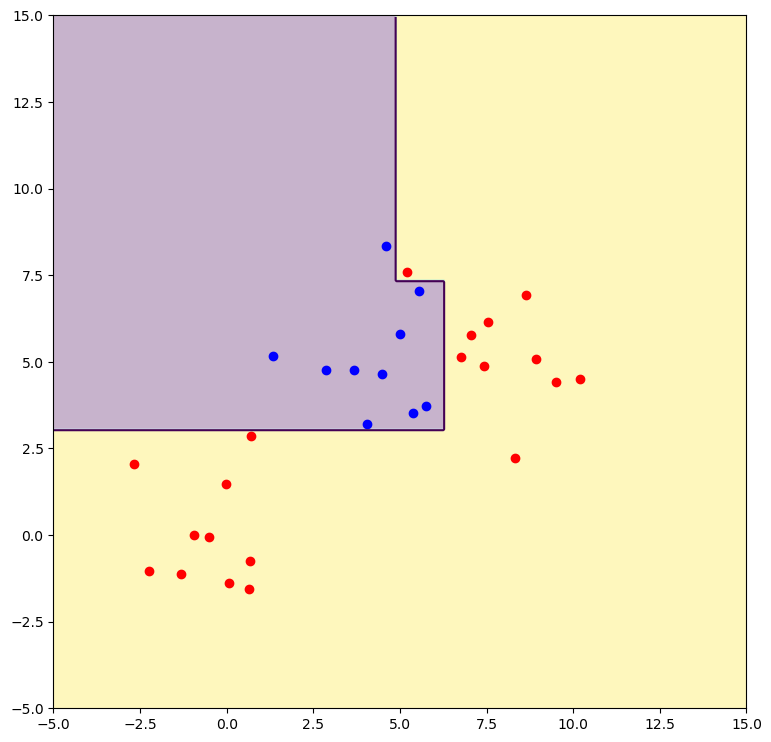

In [18]:
%matplotlib inline
#Let's see what the boundary looks like in a toy problem.
%reset -f
import numpy as np
import matplotlib.pyplot as plt
MAXN=10
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

from sklearn import tree
from sklearn import metrics

delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

In [19]:
#Export Tree
import os
dotfile = tree.export_graphviz(clf, out_file = "toy_tree.dot")

os.system("dot -Tpng toy_tree.dot -o toy_tree.png")

1

In [23]:
X

array([[-0.52094731, -0.07033353],
       [-2.67024512,  2.05033851],
       [-2.24179448, -1.05218421],
       [ 0.62860177, -1.55661011],
       [-1.32244027, -1.13625952],
       [ 0.68931756,  2.86526002],
       [ 0.05192424, -1.39740681],
       [ 0.6738229 , -0.74519962],
       [-0.02391312,  1.46875152],
       [-0.93483869,  0.01128156],
       [ 3.68283816,  4.76534874],
       [ 5.38485568,  3.51683143],
       [ 4.49176705,  4.64572395],
       [ 4.04351748,  3.21858157],
       [ 2.86817416,  4.76975721],
       [ 4.59641456,  8.34705018],
       [ 1.34784864,  5.16908976],
       [ 5.5556668 ,  7.03945079],
       [ 5.75278581,  3.73367944],
       [ 5.00001464,  5.81352886],
       [ 7.5297377 ,  6.15651761],
       [ 5.19786402,  7.596777  ],
       [10.20151702,  4.49648399],
       [ 8.91701117,  5.07195589],
       [ 6.75629707,  5.13156533],
       [ 9.50054883,  4.42836122],
       [ 7.43649587,  4.88829386],
       [ 8.6502445 ,  6.91756885],
       [ 7.04798104,

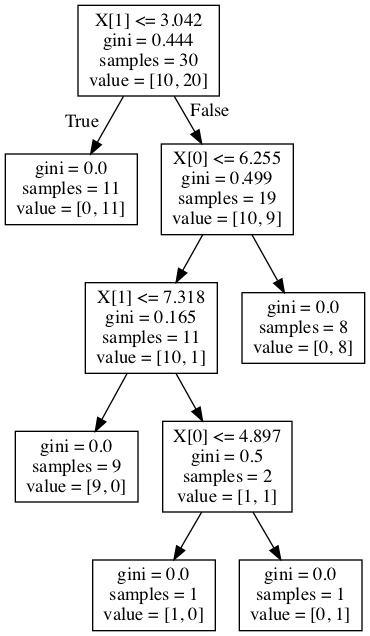

In [20]:
from IPython.core.display import Image
Image("toy_tree.png")

Comprobemos el significado del árbol. El primer nodo divide el conjunto de entrenamiento utilizando la característica $1$ aplicando el umbral $\leq 3,04$. Como resultado, podemos clasificar correctamente once de los treinta puntos de datos. Veamos el límite en ese caso.

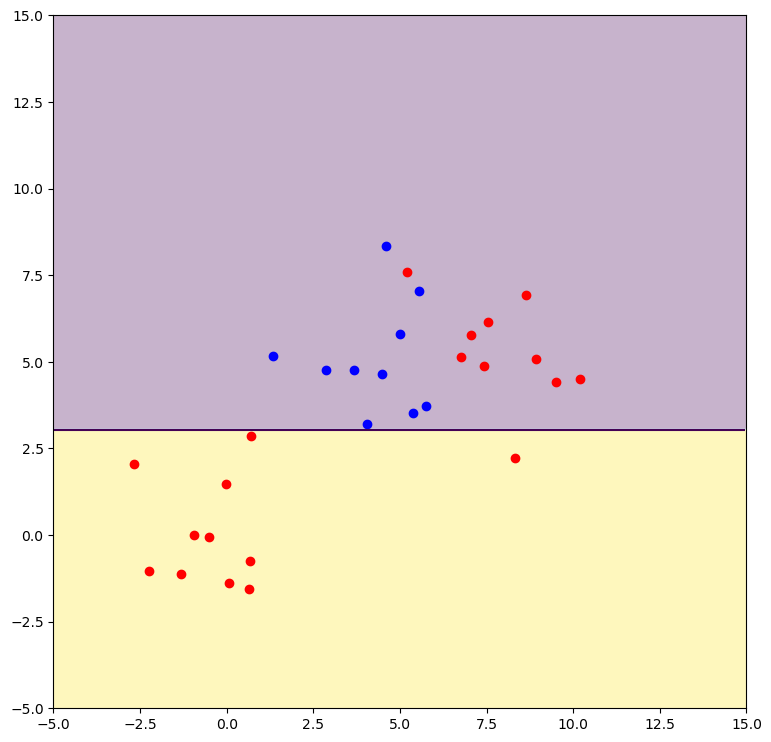

In [24]:
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=1)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')


plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

El segundo nodo divide el conjunto de entrenamiento utilizando la característica $0$ aplicando el umbral $\leq 6,25$. Observa que esto sólo se utiliza en la parte del espacio donde la característica $1$ es mayor que $3,04$. Y que el espacio azul restante se caracteriza por la siguiente función lógica: $(x_1>3,04) \wedge (x_0\leq 6,25)$

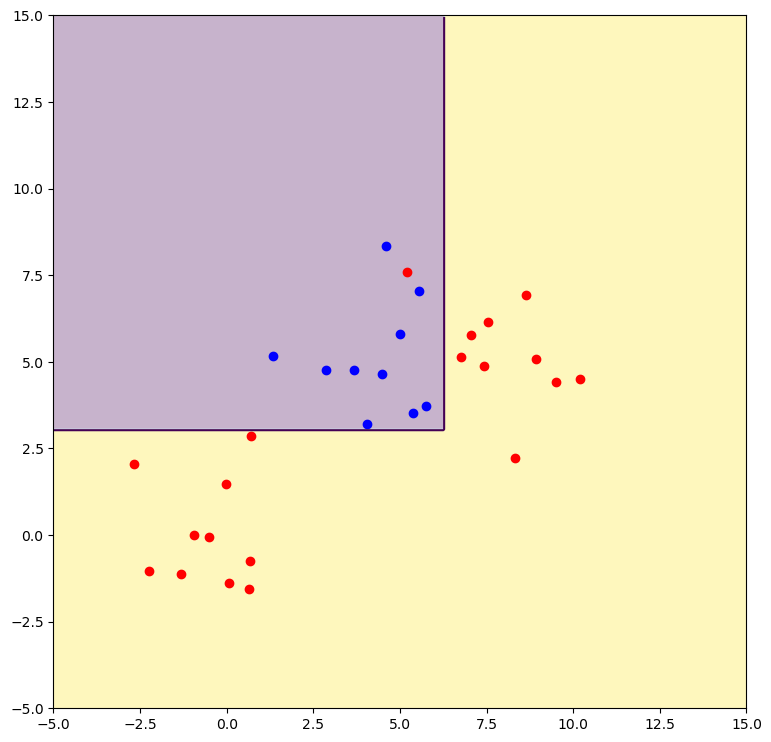

In [25]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

¿Qué tienen de bueno los árboles de decisión?

+ Los árboles son fáciles de interpretar para los humanos. Pueden verse como un conjunto de reglas. Cada camino de la raíz a una hoja del árbol es una combinación AND de las características de umbral.
+ Dado un conjunto finito de datos, los árboles de decisión pueden expresar cualquier función de los atributos de entrada. En ${\bf R}^d$ podemos aislar cada punto del conjunto de datos construyendo una caja alrededor de cada uno de ellos.
+ Puede haber más de un árbol que se ajuste a los mismos datos. De todos ellos nos gustaría un árbol con el mínimo número de nodos. Pero el problema es NP.

### 2.1.2 Entendiendo el Árbol

Debido a que el problema es NP, podemos recurrir a un algoritmo de construcción voraz. Los algoritmos voraces (Greedy algorithms) eligen la mejor partición binaria actual sin tener en cuenta su impacto en la calidad de las divisiones subsiguientes.

La idea del algoritmo es la siguiente:

+ Inicializa el algoritmo con un nodo asociado al conjunto de datos completo.

**mientras** la lista no esté vacía
1. Recupera el primer nodo de la lista.
2. Encuentra los datos asociados a ese nodo.
3. Encuentra un punto de división.
4. Si el nodo es divisible, crea los nodos vinculados al nodo padre y ponlos en la lista de exploración.

#### El criterio de división

Hay muchos criterios de división diferentes. Los más comunes son:

+ Error de clasificación
+ Índice de Gini
+ Entropía cruzada/Ganancia de información/Información mutua

Sin entrar en detalles, los errores de clasificación en divisiones voraces seleccionan la división que corrige más datos en cada punto. El índice de Gini y la entropía cruzada modelan probabilísticamente la noción de impureza de un nodo. La división se elige de manera que se maximice la pureza promedio de los nuevos nodos. Observa que a medida que descendemos en el árbol, la pureza aumenta y eventualmente converge a hojas puras. Una buena manera de pensar sobre la entropía es el símil de Pedro Domingos con la sorpresa. La entropía mide la sorpresa/información promedio que produce un resultado probabilístico. En una variable binaria, la máxima sorpresa ocurre cuando ambos resultados son igualmente probables, uno tiene la máxima incertidumbre sobre el resultado. De lo contrario, la sorpresa disminuye. Este comportamiento también se muestra en el índice de Gini.

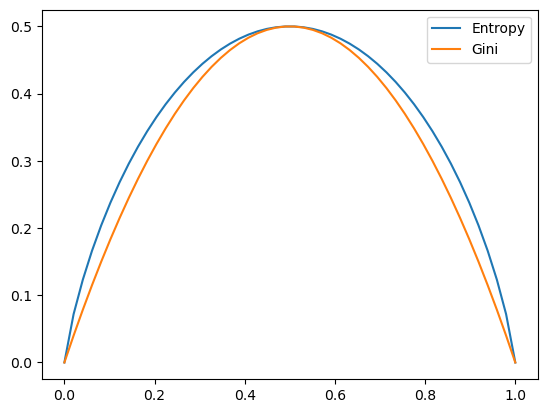

In [26]:
import numpy as np
entropy = lambda p: -np.sum(p * np.log2(p)) if not 0 in p else 0
gini = lambda p: 1. - (np.array(p)**2).sum()
pvals = np.linspace(0, 1)        
plt.plot(pvals, [entropy([p,1-p])/2. for p in pvals], label='Entropy')
plt.plot(pvals, [gini([p,1-p]) for p in pvals], label='Gini')
plt.legend()

### 2.1.3 Los Árboles y el Overfitting

Dado que los árboles son modelos muy expresivos, pueden modelar perfectamente cualquier conjunto de entrenamiento y sobreajustarse con facilidad.

Hay dos formas de evitar el sobreajuste en los árboles:

+ Detener el crecimiento del árbol cuando la división no es estadísticamente significativa.
+ Hacer crecer un árbol completo y podarlo posteriormente.

Uno de los métodos más sencillos es el «reduced error prunning» ("poda de error reducido"). El procedimiento es el siguiente

1. 1. Dividir los datos en entrenamiento y validación
2. 2. Crear un árbol candidato en el conjunto de entrenamiento
3. Ir "podando" hasta que más seguir haciendolo sea perjudicial
    1. Evaluar el impacto en el conjunto de validación de la eliminación de cada nodo posible (con descendientes)
    2. 2. Eliminar el nodo que más mejore el rendimiento.
    
La poda no está implementada en sklearn por el momento. Sin embargo, vamos a comprobar lo que ocurre en nuestro problema de predicción de pérdida de clientes cuando utilizamos un árbol de decisión.

In [27]:
%reset -f
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = data[1]
features = data[2]
print ('Loading ok.')

Loading ok.


In [28]:
#NO SNOOPING
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import metrics


kf=model_selection.KFold(n_splits=5, shuffle=False)
kf.get_n_splits()
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    dt = tree.DecisionTreeClassifier(criterion='entropy')
    dt.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.9162950056503281


C:\Users\alfons.marques\AppData\Local\Temp\ipykernel_6860\1347475485.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
C:\Users\alfons.marques\AppData\Local\Temp\ipykernel_6860\1347475485.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


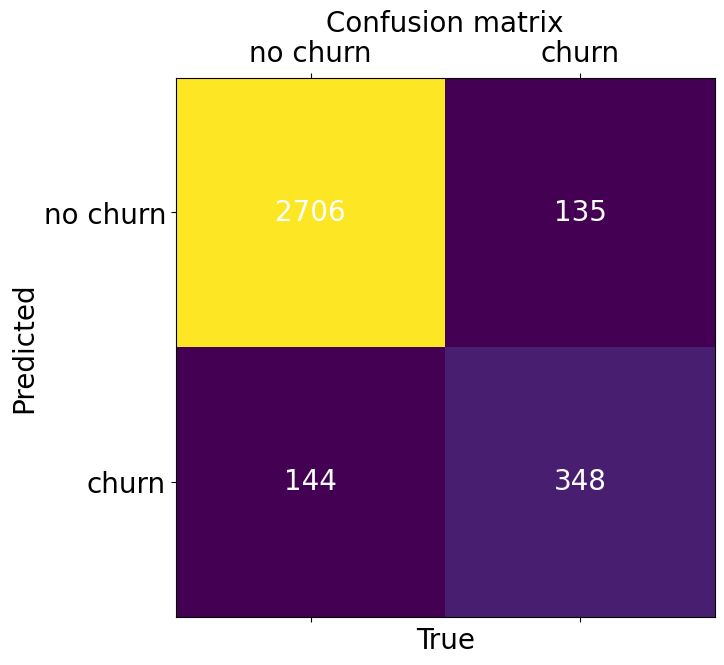

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2850
           1       0.71      0.72      0.71       483

    accuracy                           0.92      3333
   macro avg       0.83      0.83      0.83      3333
weighted avg       0.92      0.92      0.92      3333



In [29]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

In [ ]:
# Let us check the concepts with churn as the positive class
TP = np.sum(np.logical_and(yhat==1,y==1))
TN = np.sum(np.logical_and(yhat==0,y==0))
FP = np.sum(np.logical_and(yhat==1,y==0))
FN = np.sum(np.logical_and(yhat==0,y==1))

print ('TP: ' + str(TP))
print ('TN: ' + str(TN))
print ('FP: ' + str(FP))
print ('FN: ' + str(FN))
print ('sensitivity/recall: '+ str(TP/(TP+FN)))
print ('precision: '+ str(TP/(TP+FP)))

Observa que al utilizar un árbol de decisión, la recuperación aumenta en $30\%$ mientras que la precisión se sitúa en un nivel similar al de Nearest Neighbors. Comprobemos los primeros niveles del árbol:

In [ ]:
import os
#Let us check the the first three levels of the tree. GraphViz and PyDot are needed.
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
dt.fit(Xs,y)

#Export Tree

dotfile = tree.export_graphviz(dt, out_file = "churn.dot", feature_names = features)


os.system("dot -Tpng churn.dot -o churn.png")

In [ ]:
from IPython.core.display import Image
Image("churn.png")

Observa la primera división de características y los valores de la entropía según la división.

In [ ]:
entropy = lambda p: -np.sum(p * np.log2(p)) if not 0 in p else 0

#Let us check the entropy on the root node
#There are 2850 samples of customers that stay in the company. The frequency is
proot = 2850/3333
#And the entropy value is
print( 'Root node entropy: '+ str(entropy([proot,1-proot])))

#After the split we have the following frequencies for the left and right children
pleft = np.sum([2476,166,13,111])/3122 #Frequency of label 0 on the left node
pright = np.sum([32,5,44,3])/211 #Frequency of label 0 on the right node

print( 'Left node entropy: '+ str(entropy([pleft,1-pleft])))
print ('Right node entropy: '+ str(entropy([pright,1-pright])))

#Information gain computes the difference between the entropy of the parent and the weighed entropies of the children
# I = H_root - \sum freq_i * H_i

I = entropy([proot,1-proot]) - 3122/3333*entropy([pleft,1-pleft])+211/3333*entropy([pright,1-pright])

print ('Information gain: '+ str(I))



La división reduce la entropía media de los hijos, por lo que las divisiones son más puras.

Observaciones:

+ Debido a que hemos restringido (a efectos de visualización) la profundidad máxima del árbol, las hojas no son puras. 
+ Analizando las hojas podemos ver que la mayoría de los clientes que están enganchados al plan comparten las siguientes condiciones:

$$(\text{Cargo por día} \leq 1,5) \wedge (\text{Llamadas al Servicio de Atención al Cliente} \leq 1,47) \wedge (\text{Plan Internacional} \leq 1,36)$$

Observa que estos valores están preprocesados y, como tales, transmiten poca información interpretable. Por lo tanto, para dar sentido a las condiciones anteriores tenemos que invertir la transformación. Podemos hacerlo de varias maneras, una de ellas es utilizar la interpolación y la consulta de la característica de interés.

In [ ]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
idx_global = features.tolist()

#Day Charge
plt.subplot(1,3,1)
idx = idx_global.index('Day Charge')
selection = X[:,idx]
idx_sort = np.argsort(selection)
plt.plot(Xs[idx_sort,idx], X[idx_sort,idx])
spline = interpolate.UnivariateSpline(x=Xs[idx_sort,idx], y=X[idx_sort,idx])
plt.plot(Xs[idx_sort,idx],spline(Xs[idx_sort,idx]),'r')
plt.title('Day Charge transformation')
ax = plt.gca()
ax.set_xlabel('Transformed data')
ax.set_ylabel('Original data')
print ('Day Charge < '+str(spline([1.55])[0]))


#CustServ Calls
plt.subplot(1,3,2)
idx = idx_global.index('CustServ Calls')
selection = X[:,idx]
idx_sort = np.argsort(selection)
plt.plot(Xs[idx_sort,idx], X[idx_sort,idx],'o')
spline = interpolate.UnivariateSpline(x=Xs[idx_sort,idx], y=X[idx_sort,idx])
plt.plot(Xs[idx_sort,idx],spline(Xs[idx_sort,idx]),'r')
plt.title('Customer Service Calls transformation')
ax = plt.gca()
ax.set_xlabel('Transformed data')
ax.set_ylabel('Original data')
print ('Customer service calls <' + str(spline([1.47])[0]))

#International Plan
plt.subplot(1,3,3)
idx = idx_global.index("Int'l Plan")
selection = X[:,idx]
idx_sort = np.argsort(selection)
plt.plot(Xs[idx_sort,idx], X[idx_sort,idx],'o')
spline = interpolate.UnivariateSpline(x=Xs[idx_sort,idx], y=X[idx_sort,idx])
plt.plot(Xs[idx_sort,idx],spline(Xs[idx_sort,idx]),'r')
plt.title('International Plan transformation')
ax = plt.gca()
ax.set_xlabel('Transformed data')
ax.set_ylabel('Original data')
print ('International Plan < ' + str(spline([1.36])[0]))

fig = plt.gcf()
fig.set_size_inches(16,4)

Así, el perfil final de los 2.476 clientes que no abandonan tiene en común:

$$(\text{Day Charge} \leq 45) \wedge (\text{Customer Service Calls} < 4) \wedge (\text{International Plan}= \text{NO})$$

# 3. Extendiendo Support Vector Machines a Casos No Lineales. Breve Introducción a Kernels.

Hemos visto que un modelo lineal en los parámetros puede modelar límites no lineales siempre que **explícitamente** mapeemos los datos originales de forma no lineal. Por ejemplo, podemos crear un modelo lineal con características al cuadrado. Esto dará lugar a un límite cuadrático con respecto al espacio original. Hay otra forma de codificar **implícitamente** las no linealidades mediante **kernels**.

El núcleo codifica la noción de similitud entre dos puntos de datos. 

El cambio en la formulación implica la introducción de varios conceptos procedentes del análisis matemático. Con el objetivo de simplificar, nos saltaremos los detalles (lee «La historia de un kernel» en el párrafo siguiente o pregunta cualquier detalle si tienes curiosidad).

Como resultado, cualquier problema de optimización de la función de coste regularizado como SVM tiene una solución de la siguiente forma,

$$f(x) = \sum\limits_{i=1}^N \alpha_i k(x_i,x)$$


<div class = "alert alert-info">**La historia de un kernel**
<p>
*Disclaimer: Esta es una historia altamente no rigurosa matemáticamente de cómo los kernels entran en juego en Machine Learning.*
<p>
En algún momento hablamos de mantener la complejidad bajo control. Para eso necesitamos medir la complejidad. Y vimos que ciertos modelos, como los modelos lineales, pueden controlarla usando la norma de los pesos. Añadir esta penalización a la función objetivo que estamos optimizando se llama *regularización*.
<p>
Sin embargo, sería genial poder medir la complejidad de cualquier función. Para abordar este problema tenemos que recurrir al análisis funcional. El análisis funcional es una rama del análisis matemático que trata con espacios de funciones. Para ese propósito, se debe introducir un espacio de Hilbert para que se pueda medir la similitud y la distancia entre funciones. Un espacio de Hilbert es un espacio vectorial completo con producto interno. Intuitivamente, generaliza el espacio euclidiano clásico a dimensiones infinitas y, por lo tanto, a espacios funcionales.
<p>
Un espacio funcional particular es el Espacio de Hilbert con Núcleo Reproductor (RKHS). En este espacio, una función evaluada en un punto $x$ se define por el producto interno de la función y el kernel evaluado en ese punto, es decir, $f(x) = \langle f(\cdot),K(x,\cdot) \rangle$, donde $K$ es el kernel. Esto se llama representación de Riesz y es la clave para mostrar el resultado más importante para nuestros problemas, *el teorema del representante*.
<p>
El teorema del representante establece que la solución de cualquier problema con la siguiente forma 
$$
	f^*=\underset{f\in \mathcal{H}}{\operatorname{arg\,min}}\frac{1}{n}\sum_i{\mathcal{L}(f(x_i),y_i)}+\lambda\|f\|_{\mathcal{H}}^2
	$$
se da por
$$f(x) = \sum\limits_{i=1}^N \alpha_i k(x_i,x)$$
donde $x_i$ son nuestras muestras.
</div>  

El kernel tiene que ser una función semidefinida positiva, como por ejemplo:

+ Kernel Lineal: $$k(x_i,x_j) = x_i^Tx_j$$
+ Kernel Polinómico: $$k(x_i,x_j) = (1+ x_i^Tx_j)^p$$
+ Kernel de la función de base radial: $$k(x_i,x_j) = e^{-\frac{\|x_i-x_j\|^2}{2\sigma^2}}$$


<div class = "alert alert-error"> Desde un punto de vista práctico, puede definir un kernel utilizando su distancia favorita $d(x_i,x_j)$ y definiendo el kernel como
$$k(x_i,x_j) = e^{-\gamma d(x_i,x_j)}, \quad \gamma>0$$
Donde $\gamma$ es un hiperparámetro que controla el decaimiento del exponencial (lo ajustaremos mediante validación cruzada). Obsérvese que RBF es una instanciación de esta regla más general.
</div>

Como se ha comentado antes, los kernels codifican implícitamente una transformación no lineal y recordemos que SVM encuentra el hiperplano óptimo. Combinando ambos conceptos tenemos un método lineal aplicado sobre un dato en un espacio transformado, pero no tenemos que proporcionar la transformación explícita.

Esto se vuelve increíblemente útil cuando uno se da cuenta de que el mapeo de características de un núcleo de función de base radial es un mapeo en un espacio $\infty$-dimensional.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA', size=700)

Vamos a probar con este ejemplo:

In [ ]:
#Let's see what the boundary looks like in a toy problem.
%matplotlib inline
%reset -f
import numpy as np
import matplotlib.pyplot as plt
MAXN=10
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1

from sklearn import svm
from sklearn import metrics

delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];

def SVC_gamma(gamma, C):
    clf = svm.SVC(kernel = 'rbf', gamma = gamma, C = C)
    clf.fit(X,y.ravel())
    Z=clf.decision_function(data)
    Z.shape=sz
    plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
    plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
    plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
    plt.contour(XX,YY,Z,[0])
    fig = plt.gcf()
    fig.set_size_inches(9,9)

from IPython.html.widgets import interact    
interact(SVC_gamma, gamma=(0.011,5.,0.01), C = (0.01,2))

# 3.1 Aplicación a la predicción de pérdida de clientes

Vamos a aplicar el SVM con kernel RBF para la predicción de churn de clientes. Normalmente, los clasificadores discriminantes no son invariantes afines y tenemos que considerar algún proceso de normalización de características. Por el bien de la equidad, utilizaremos el mismo método de estandarización.

In [ ]:
%reset -f
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = data[1]
features = data[2]
print ('Loading ok.')

In [ ]:
#NO SNOOPING
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics


kf=model_selection.KFold(n_splits=5,  shuffle=False)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #Standard parameters
    clf = svm.SVC(kernel='rbf', gamma = 0.051, C = 1)
    clf.fit(X_train,y_train.ravel())
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

In [ ]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

Hagamos una validación cruzada de los parámetros y comprobemos si podemos hacerlo mejor.

In [ ]:
#from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
parameters = {'C':[ 2,4,8],'gamma':[0.02, 0.05, 0.1], 'class_weight':[{0:0.5},{0:1},{0:2}]}

kf=model_selection.KFold( n_splits=5, shuffle=False)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #Standard parameters
    clf = svm.SVC(kernel='rbf', class_weight={0:1,1:10})
    # We can change the scoring "average_precision", "recall", "f1"
    clf = model_selection.GridSearchCV(clf, parameters, scoring='average_precision')
    clf.fit(X_train,y_train.ravel())
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    #recall, f1, precision
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    print (str(clf.best_params_))
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

In [ ]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

<div class = "alert alert-success"> **PREGUNTA:** Nos enfrentamos a un problema de datos no balanceados. Cambia el código para sesgar el modelo y hacer frente al desequilibrio.
</div>

# PART 2. Aprendizaje por conjuntos (Ensemble Learning)

Cuando queremos comprar un producto solemos leer las opiniones de los usuarios. Antes de someternos a una intervención quirúrgica importante, buscamos la opinión de diferentes expertos. El aprendizaje por conjuntos imita uno de los mecanismos humanos, que es la reducción de la incertidumbre, buscando opiniones adicionales antes de tomar una decisión importante.

El aprendizaje por conjuntos se divide en dos pasos:

1. 1. Entrenar un conjunto de clasificadores
2. 2. Agregar sus resultados

Existen diferentes razones para utilizar el aprendizaje por conjuntos en la práctica:

1. **La combinación de los resultados de distintos clasificadores puede reducir el riesgo de una selección desafortunada de un clasificador de bajo rendimiento.
2. **Conjuntos de datos a gran escala:** No tiene mucho sentido tener sólo un clasificador en conjuntos de datos muy grandes. Parcelar los datos en subconjuntos más pequeños y agregarlos parece una buena idea.
3. **Algunos problemas son demasiado difíciles de resolver con un único clasificador. La frontera de decisión puede ser demasiado compleja o situarse fuera del espacio de funciones del clasificador.
4. **Fusión de datos:** La fusión de distintas fuentes suele ser un problema. Normalmente nos enfrentamos a datos procedentes de fuentes heterogéneas y la cuestión es cómo fusionar estos datos. Una solución es entrenar un clasificador por fuente y fusionar las decisiones de esos expertos.

## 1. Introducción al Ensemble Learning

## 1.1 Diversidad

Una condición necesaria para que el sistema funcione es que se produzcan errores en distintos clasificadores sobre muestras diferentes para que la combinación estratégica de los clasificadores corrija posibles errores en el juicio de la clase o un caso concreto. Este efecto se ha denominado **Diversidad**.

La diversidad puede obtenerse de diferentes maneras:

+ Utilizando diferentes conjuntos de entrenamiento. Utilizar estrategias de remuestreo para obtener diferentes clasificadores óptimos. Este efecto está correlacionado con la noción de estabilidad del clasificador y con los conceptos de sesgo y varianza del clasificador.
+ Utilizar diferentes parámetros de entrenamiento para diferentes clasificadores.
+ Combinando diferentes arquitecturas. (es decir, svm, árboles de decisión, ...)
+ Entrenamiento en diferentes características. (es decir, subespacios aleatorios o proyecciones aleatorias)r fuente y la fusión de la decisión de esos expertos.

## 1.2 Agregación Bootstrapping 

Bootstrapping significa volver a muestrear el conjunto de datos de entrenamiento con reemplazo. Normalmente se utiliza el mismo número de datos que el conjunto de datos original.

**La agregación bootstrapping (también conocida como Bagging)** es una técnica de ensamblaje que utiliza múltiples copias bootstrapped del conjunto de entrenamiento para construir un conjunto de clasificadores. Un clasificador para cada copia de entrenamiento bootstrapped. Y, a continuación, utiliza una técnica de combinación, como la votación por mayoría, para tomar la decisión final.

Veamos cómo funciona:

In [ ]:
#Let us train an overfitted classifier. For example an SVC.
%reset -f
import numpy as np
import matplotlib.pyplot as plt
MAXN=60
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1

from sklearn import tree
from sklearn import metrics

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]


clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X,y.ravel())
Z=clf.predict(data)
mx= np.max(Z)
mn= np.min(Z)
Z.shape=sz
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=mn, vmax=mx)
plt.colorbar()
plt.contour(XX,YY,Z,[0])

fig = plt.gcf()
fig.set_size_inches(9,9)


In [ ]:
def train_bagged_tree(X,y,C):
    clf_list=[]
    for i in range(C):
        np.random.seed(None)
        idx=np.random.randint(0,y.shape[0],y.shape[0])
        clf = tree.DecisionTreeClassifier(criterion="entropy")
        Xr=X[idx,:]
        yr=y[idx]
        clf_list.append((clf.fit(Xr,yr.ravel()),idx))  #Add the indices for visualization purposes in test
    return clf_list


def visualize_bagged_tree(X,y,clf_list):
    C = len(clf_list)
    x = np.linspace(-5,15,200)
    XX,YY = np.meshgrid(x,x)
    sz=XX.shape
    data=np.c_[XX.ravel(),YY.ravel()]
    yhat=np.zeros((data.shape[0],len(clf_list)))
    i=0
    for dt,idx in clf_list:
        yhat[:,i]=dt.predict(data)
        Xr=X[idx,:]
        yr=y[idx]
        mx= np.max(yhat[:,i])
        mn= np.min(yhat[:,i])
        plt.subplot(int(np.floor(C/4))+1,4,i+1)
        plt.scatter(Xr[(yr==1).ravel(),0],Xr[(yr==1).ravel(),1],color='r')
        plt.scatter(Xr[(yr==-1).ravel(),0],Xr[(yr==-1).ravel(),1],color='b')
        plt.imshow(yhat[:,i].reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=mn, vmax=mx)
        plt.contour(XX,YY,yhat[:,i].reshape(sz),[0])
        i=i+1
    fig = plt.gcf()
    fig.set_size_inches(20,7*int(np.floor(C/4))+1)
    return yhat


clf_list=train_bagged_tree(X,y,16)
y_pred=visualize_bagged_tree(X,y,clf_list)
y_pred = np.sum(y_pred,axis=1)

print ('Process finnished.')


In [ ]:
mx= np.max(y_pred)
mn= np.min(y_pred)
plt.figure()
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
plt.imshow(y_pred.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=mn, vmax=mx)
plt.colorbar()
plt.contour(XX,YY,y_pred.reshape(sz),[0])
fig = plt.gcf()
fig.set_size_inches(10,10) 

In [ ]:
Zb = y_pred.reshape(sz)
plt.subplot(1,2,1)
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
plt.imshow(Zb, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=mn, vmax=mx)
plt.contour(XX,YY,Zb,[0])
plt.subplot(1,2,2)
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(16,9)

### 1.2.1 Aplicación a la predicción del churn de clientes

Comprobemos este enfoque en el problema Churn. Recordemos que un único árbol de decisión obtuvo una exactitud de 91,7 %$, una precisión de 71 %$ y una recuperación de 72 %$.

In [ ]:
%reset -f
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = 2*data[1]-1
features = data[2]
print ('Loading ok.')

In [ ]:
def train_bagged_tree(X,y,C):
    clf_list=[]
    for i in range(C):
        np.random.seed(None)
        idx=np.random.randint(0,y.shape[0],y.shape[0])
        clf = tree.DecisionTreeClassifier(criterion="entropy")
        Xr=X[idx,:]
        yr=y[idx]
        clf_list.append(clf.fit(Xr,yr.ravel()))  
    return clf_list


def test_bagged_tree(X,clf_list):
    yhat=np.zeros((X.shape[0],len(clf_list)))
    i=0
    for dt in clf_list:
        yhat[:,i]=dt.predict(X)
        i=i+1
    return np.sign(np.mean(yhat,axis=1))

In [ ]:
#NO SNOOPING
import numpy as np
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics

kf=model_selection.KFold(n_splits=5, shuffle=False)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_list = train_bagged_tree(X_train,y_train.ravel(),21)
    yhat[test_index]=test_bagged_tree(X_test,clf_list) 
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

In [ ]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm.T)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

Observa que la precisión de la solución aumenta en unos $5\%$, el recall sube hasta $75\%$ y la precisión también aumenta hasta $91\%$.

<div class="alert alert-info"> **BAGGING** La mejora del rendimiento se debe a la reducción de la varianza del clasificador al tiempo que se mantiene su sesgo.
</div>

## 2. Random Forest

La técnica Random Forest introduce una aleatorización sobre la característica seleccionada para construir cada árbol del conjunto con el fin de mejorar la diversidad en un intento de reducir la varianza evan más. Veamos el código de esta variante de bagging.

In [ ]:
%reset -f
from sklearn import tree
import numpy as np
def train_random_forest(X,y,C,F):
    F=int(np.ceil(np.sqrt(X.shape[1])))
    clf_list=[]
    for i in range(C):
        np.random.seed(None)
        idx=np.random.randint(0,y.shape[0],y.shape[0])
        feat_idx=np.random.permutation(np.arange(X.shape[1]))[:F]
        clf = tree.DecisionTreeClassifier(criterion="entropy")
        Xr=X[idx,:].copy()
        Xr=Xr[:,feat_idx]
        yr=y[idx]
        clf_list.append((clf.fit(Xr,yr.ravel()),feat_idx))
    return clf_list


def test_random_forest(X,clf_list):
    yhat=np.zeros((X.shape[0],len(clf_list)))
    i=0
    for dt,feat_idx in clf_list:
        yhat[:,i]=dt.predict(X[:,feat_idx])
        i=i+1
    return np.sign(np.mean(yhat,axis=1)),yhat

In [ ]:
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = 2*data[1]-1
print ('Labels: '+ str(np.unique(y)))
features = data[2]
print ('Loading ok.')

In [ ]:
from sklearn import metrics
clf_list = train_random_forest(X,y,51,5)
yhat,yk = test_random_forest(X,clf_list)
acc = metrics.accuracy_score(yhat, y)
print (yk.shape)
print (np.sum(np.mean(yk,axis=1)>0))
print (acc)

In [ ]:
#NO SNOOPING
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn import metrics


kf=model_selection.KFold(n_splits=5, shuffle=False)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = ensemble.RandomForestClassifier(n_estimators=51)
    dt.fit(X_train,y_train)
    yhat[test_index]=dt.predict(X_test)
    #clf_list = train_random_forest(X_train,y_train,51,np.ceil(np.sqrt(X.shape[1])))
    #yhat[test_index],yk = test_random_forest(X_test,clf_list)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print (acc)
print (np.unique(yhat))
print (np.unique(y_test))
print ('Mean accuracy: '+ str(np.mean(acc)))

In [ ]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm.T)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()
draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

# 3. Frameworks Reduccionistas para los Problemas Multiclase

Hasta este momento hemos aplicado varios modelos en problemas de múltiples clases, pero hemos hablado muy poco sobre el problema de múltiples clases en el aprendizaje.

En primer lugar, hay muy pocos modelos que manejen intrínsecamente el caso de las múltiples clases. Por manejo intrínseco del problema de múltiples clases nos referimos a métodos en los que no tenemos que preocuparnos por cuántas clases tiene nuestro problema. Las dos grandes familias de modelos que pueden tratar el problema son:

+ Árboles de decisión: las hojas codifican la clase.
+ Nearest Neighbors: solo nos preocupamos por las etiquetas de clase de las instancias cercanas a nuestra muestra de consulta.

¿Qué pasa con el resto de los modelos? ¿No manejan también los modelos bayesianos o las redes neuronales este problema? Sí, funcionan en el caso de múltiples clases. Pero tenemos que preocuparnos por cuántas clases hay. En particular, tenemos que construir un modelo para cada clase y luego tomar un puntaje/probabilidad/confianza máximo entre las predicciones. Esta forma de abordar el problema multiclase también se conoce como **uno-contra-todos** porque consideramos un modelo para cada clase mientras que las muestras del resto de las clases se consideran como muestras negativas. Este es el primer ejemplo de un framework reduccionista.

El framework o marco reduccionista se refiere a esos métodos de conjunto que permiten reducir el problema de múltiples clases a un conjunto de problemas binarios. En un problema de $K$ clases, los dos enfoques más comunes en este marco son:

+ **uno-contra-todos:** Consideramos $K$ particiones del problema, correspondientes a establecer una clase como clase positiva y el resto como negativas.
+ **uno-contra-uno:** Consideramos todos los pares posibles de clases y construimos un modelo para cada subproblema.

In [ ]:
%reset -f
#Create a multiclass toy problem
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
MAXN=5
np.random.seed(0)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.25*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,-2]+1.25*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

#Display data
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r',label='class 1')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b',label='class 2')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g',label='class 3')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(9,9)

#Train a LinearSVC in one-vs-all fashion
clf_list=[]
for i in range(3):
    clf = svm.LinearSVC()
    y_meta = y.copy()
    #Create a binary problem with one class at +1 and the rest at -1
    y_meta=np.where(y_meta == i+1 ,1,-1)
    clf_list.append(clf.fit(X,y_meta.ravel()))

#Test each classifier
plt.figure()
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
i=1
yhat_d=np.empty((data.shape[0],3))
for c in clf_list:
    yhat=c.predict(data)
    #Visualization of each boundary
    yhat_d[:,i-1]=c.decision_function(data)
    mn = np.min(yhat)
    mx = np.max(yhat)
    plt.subplot(1,3,i)
    plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b',label='class 1')
    plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g',label='class 2')
    plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r',label='class 3')
    plt.imshow(yhat.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=mn, vmax=mx)
    plt.contour(XX,YY,yhat.reshape(sz),[0])
    i=i+1
fig = plt.gcf()
fig.set_size_inches(16,9)

y_final=np.argmax(yhat_d,axis=1)
plt.figure()
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b',label='class 1')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g',label='class 2')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r',label='class 3')
plt.imshow(y_final.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=2)
plt.contour(XX,YY,y_final.reshape(sz),[0, 1])
plt.title("Final decision boundary")
fig = plt.gcf()
fig.set_size_inches(16,8)

## 3.1 Error correcting output coding

El Error correcting output coding es una generalización de los métodos mostrados anteriormente. En el caso más general, a cada clase se le asigna un código ternario $c_i \in \{+1,0,-1\}^l$ con longitud $l$. Este paso se denomina **codificación**. En la prueba, una nueva muestra recibirá un código de prueba y éste se comparará en función de cierta distancia con las palabras clave de la clase. La clase con la palabra clave más cercana se seleccionará como la clase predicha. Este paso se denomina **descodificación**.

### 3.1.1 Entendiendo el paso de codificación
Si organizamos las palabras de código como filas en una matriz, obtenemos la matriz de codificación $M \in \{+1,0,-1\}^{K\times l}$. Considera el siguiente ejemplo con cuatro clases y longitud de código $l=3$:

<table>
  <tr>
    <th></th>
    <th>$h_1$</th>
    <th>$h_2$</th>
    <th>$h_3$</th>
  </tr>
  <tr>
    <th>$y_1$</th>
    <th>$1$</th>
    <th>$1$</th>
    <th>$1$</th>
  </tr>
    <tr>
    <th>$y_2$</th>
    <th>$1$</th>
    <th>$-1$</th>
    <th>$0$</th>
  </tr>
    <tr>
    <th>$y_3$</th>
    <th>$-1$</th>
    <th>$0$</th>
    <th>$1$</th>
  </tr>
    <tr>
    <th>$y_4$</th>
    <th>$-1$</th>
    <th>$0$</th>
    <th>$-1$</th>
  </tr>
</table>

La primera clase, $y_1$ está codificada como $(1,1,1)$, la segunda $y_2$ está codificada como $(1,-1,0)$, y así sucesivamente.

Nota que las columnas de la matriz definen un problema binario que involucra todas las clases de la siguiente manera: en la misma columna, todas las clases con código $+1$ pertenecen a la misma meta-clase, todas las clases con código $-1$ a la otra meta-clase, y todas las clases con código $0$ no se consideran en ese problema particular. En nuestro ejemplo, la primera columna define un problema binario que involucra la discriminación de todas las muestras de las clases $y_1, y_2$ (codificadas como $+1$) contra todas las muestras de $y_3, y_4$ (codificadas como $-1$). La segunda columna solo considera las muestras de la clase $y_1$ contra las muestras de la clase $y_2$. Observa que todas las clases codificadas con cero no se consideran.

Dada una matriz de codificación, se entrena un clasificador para cada columna de acuerdo con el problema binario definido por la columna.

<div class="alert alert-success">**PREGUNTA:** Cómo es la matriz de código del uno-vs-uno y uno-vs-todos?
</div>

### 3.1.2 Understanding the decoding step

Given a set of classifiers trained according to the problems defined by the columns of the coding matrix, in the prediction step all the classifiers are applyed to the testing sample. As a result a binary code $t$ is obtained. This coded is compared to all the class codes according to some decoding/distance metric. The most common ones are:

+ Hamming decoding/$\ell_1$-decoding
$$d(a,b) = \frac{1}{2}\sum\limits_{i=1}^l |a_i-b_i|$$

+ Euclidean decoding
$$d(a,b) = \sqrt{\sum\limits_{i=1}^l (a_i-b_i)^2}$$

For example, consider that $t=(-1,-1,-1)$. Note that there is no exact code in the coding matrix, thus we have to check for the closest one. If we apply Hamming decoding we obtain

<table>
  <tr>
    <th></th>
    <th>Hamming</th>
    <th>Euclidean</th>
  </tr>
  <tr>
    <th>$y_1$</th>
    <th>$3$</th>
    <th>$\sqrt{12}$</th>
  </tr>
    <tr>
    <th>$y_2$</th>
    <th>$\frac{3}{2}$</th>
    <th>$\sqrt{5}$</th>
  </tr>
    <tr>
    <th>$y_3$</th>
    <th>$\frac{3}{2}$</th>
    <th>$\sqrt{5}$</th>
  </tr>
    <tr>
    <th>$y_4$</th>
    <th>$\frac{1}{2}$</th>
    <th>$1$</th>
  </tr>
</table>

Observe that in both cases the sample will be predicted as class $y_4$.

Vamos a aplicar este framework al problema anterior utilizando el razonamiento del uno-vs-todos:

In [ ]:
%reset -f
#Create a multiclass toy problem
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
MAXN=5
np.random.seed(0)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.25*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,-2]+1.25*np.random.randn(MAXN,2)])
y = np.concatenate([0*np.ones((MAXN,1)),1*np.ones((MAXN,1))])
y = np.concatenate([y,2*np.ones((MAXN,1))])
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

#Define the coding matrix
M = np.array([[1, -1, -1],[-1, 1, -1],[-1, -1, 1]]) #1vsAll
#M = np.array([[1, 1, 0 ],[-1, 0, 1],[0, -1, -1]]) #1vs1

print ('Coding matrix M = \n' + str(M))
def inset(a,b): 
    return [item in b for item in a]

def fit_ECOC(X, y, M):
    clf_list=[]
    for i in range(M.shape[1]): #For each column
        y_meta=y.copy()
        idx_c1 = np.where(inset(y, np.where(M[:,i]==1)[0]))[0]
        idx_c2 = np.where(inset(y, np.where(M[:,i]==-1)[0]))[0]
        clf = svm.LinearSVC()
        clf_list.append(clf.fit(np.r_['0',X[idx_c1,:],X[idx_c2,:]],np.r_['0',np.ones((idx_c1.shape[0],1)),-np.ones((idx_c2.shape[0],1))].ravel()))
    return clf_list

def predict_ECOC(X,M, clf_list):
    #Test codes
    c = np.zeros((X.shape[0],M.shape[1]))
    for i in range(M.shape[1]):
        c[:,i]=clf_list[i].decision_function(X) #SOFT CODES
        #c[:,i]=clf_list[i].predict(X) #HARD CODES 
    #Use Euclidean distance
    i=0
    d = np.zeros((X.shape[0],M.shape[0]))
    for code in M:
        d[:,i]=np.sum(np.power((c-code),2),axis=1)
        i=i+1
    return np.argmin(d,axis=1)    


clf_list=fit_ECOC(X,y,M)
y_final = predict_ECOC(data,M,clf_list)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='b',label='class 1')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='g',label='class 2')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r',label='class 3')
plt.imshow(y_final.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=2)
plt.contour(XX,YY,y_final.reshape(sz),[0, 1])
plt.title("Final decision boundary")
fig = plt.gcf()
fig.set_size_inches(16,8)

<div class="alert alert-success">
**PREGUNTA:** Sustituye la predicción de hard codes por la soft code cambiando en la función ECOC_predict() el «.predict» por «.decision_function». Ejecuta el algoritmo con el enfoque de uno contra todos. ¿Qué observas?
</div>

<div class="alert alert-success">
**PREGUNTA:** Sustituye la matriz de código por la de uno-vs-uno.
</div>

In [ ]:
M = np.array([[1, 1, 0 ],[-1, 0, 1],[0, -1, -1]])
clf_list=fit_ECOC(X,y,M)
y_final2 = predict_ECOC(data,M,clf_list)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='b',label='class 1')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='g',label='class 2')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r',label='class 3')
plt.imshow(y_final2.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=2)

plt.imshow(y_final.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=2)
plt.contour(XX,YY,y_final2.reshape(sz),[0, 1])
plt.title("Final decision boundary")
fig = plt.gcf()
fig.set_size_inches(16,8)